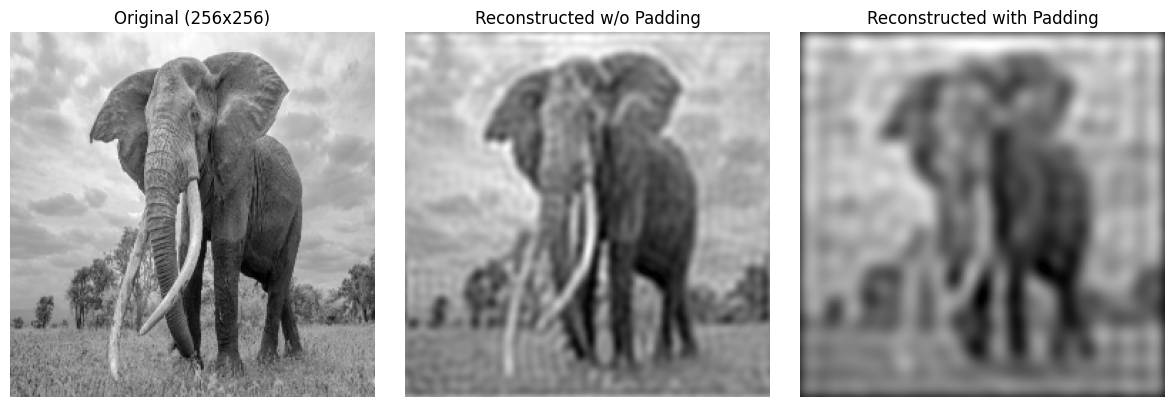

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def dft_filtering(image_path, output_path="dft_comparison.png"):
    # Read grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise FileNotFoundError("Image not found. Check the path.")

    # Resize to 256x256
    img = cv2.resize(img, (256, 256))

    # ========================
    # Case A: Without Padding
    # ========================
    dft_no_pad = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift_no_pad = np.fft.fftshift(dft_no_pad)

    # Create ideal low-pass filter mask
    rows, cols = img.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols, 2), np.uint8)
    r = 30  # radius for low-pass
    cv2.circle(mask, (ccol, crow), r, (1, 1), -1)

    # Apply mask
    fshift_no_pad = dft_shift_no_pad * mask
    f_ishift_no_pad = np.fft.ifftshift(fshift_no_pad)
    img_back_no_pad = cv2.idft(f_ishift_no_pad)
    img_back_no_pad = cv2.magnitude(img_back_no_pad[:, :, 0], img_back_no_pad[:, :, 1])

    # ========================
    # Case B: With Padding
    # ========================
    # Pad image to double size (512x512)
    padded = np.zeros((512, 512), np.float32)
    padded[:rows, :cols] = img

    dft_pad = cv2.dft(padded, flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift_pad = np.fft.fftshift(dft_pad)

    # Create mask of same size
    prow, pcol = padded.shape
    crow, ccol = prow // 2, pcol // 2
    mask_pad = np.zeros((prow, pcol, 2), np.uint8)
    r = 30
    cv2.circle(mask_pad, (ccol, crow), r, (1, 1), -1)

    # Apply mask
    fshift_pad = dft_shift_pad * mask_pad
    f_ishift_pad = np.fft.ifftshift(fshift_pad)
    img_back_pad = cv2.idft(f_ishift_pad)
    img_back_pad = cv2.magnitude(img_back_pad[:, :, 0], img_back_pad[:, :, 1])

    # Crop back to 256x256
    img_back_pad = img_back_pad[:rows, :cols]

    # ========================
    # Display results
    # ========================
    titles = ["Original (256x256)",
              "Reconstructed w/o Padding",
              "Reconstructed with Padding"]
    images = [img, img_back_no_pad, img_back_pad]

    plt.figure(figsize=(12, 4))
    for i in range(3):
        plt.subplot(1, 3, i+1)
        plt.imshow(images[i], cmap="gray")
        plt.title(titles[i])
        plt.axis("off")

    plt.tight_layout()
    plt.savefig(output_path)
    plt.show()


# Example usage
image_path = "/content/elephant.jpg"
dft_filtering(image_path, output_path="dft_comparison.png")